<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [2]:
ruta_archivo_csv = 'financial_assets_prices.csv'
df = pd.read_csv(ruta_archivo_csv)

In [3]:
df.sample(10)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
364,2020-05-26,246.9192,65.934,28.077917,308.54,41.615
503,2020-12-07,257.9800,80.494,30.633095,336.66,50.720
597,2021-04-16,250.8722,91.013,34.218320,341.53,60.170
197,2019-10-04,253.6501,64.752,30.101880,324.91,50.570
688,2021-08-23,255.4013,97.864,36.904421,344.24,64.420
682,2021-08-13,255.5711,97.425,37.133332,344.50,66.170
599,2021-04-20,250.5959,89.881,33.611733,341.09,60.190
532,2021-01-15,257.3475,82.230,31.628817,337.37,54.770
30,2019-02-13,232.5939,61.244,27.540367,310.36,53.520
545,2021-02-03,255.8875,83.452,31.355481,338.44,55.160


In [4]:
df.columns

Index(['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

In [5]:
df = df.fillna(method='ffill')

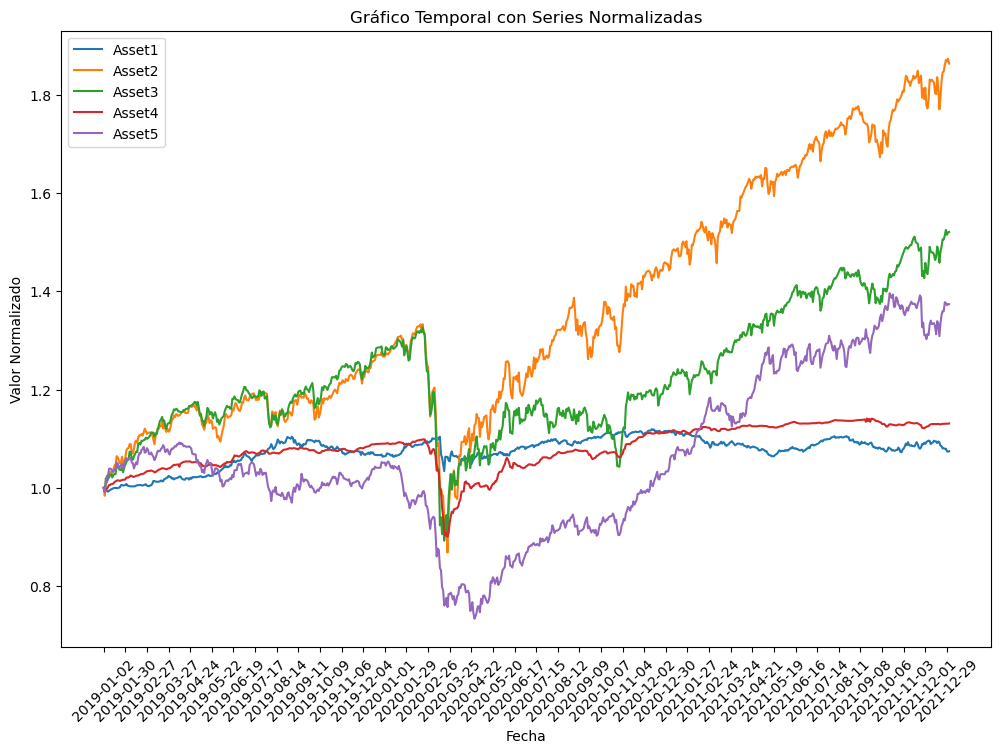

In [6]:
df_normalized = df.copy()
for column in df.columns[1:]:  # Ignora la columna 'date'
    df_normalized[column] = df[column] / df[column].iloc[0] #Normalizamos

plt.figure(figsize=(12, 8))
for column in df_normalized.columns[1:]:
    plt.plot(df_normalized["date"], df_normalized[column], label=column)

plt.title('Gráfico Temporal con Series Normalizadas')
plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.xticks(df_normalized['date'][::20], rotation=45)
plt.legend()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [7]:
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')

df_returns = df.set_index('date').pct_change().dropna()
df_returns.head(15)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003
2019-01-10,0.001496,0.000642,0.005754,0.000361,0.000568
2019-01-11,0.001388,0.000434,0.000867,0.001608,-0.001513
2019-01-14,0.001139,-0.001785,-0.006756,-0.000033,-0.003598
2019-01-15,0.001023,0.006546,0.005581,0.001245,-0.001520


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [8]:
columnas_asset = ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']

df_asset = df[columnas_asset]

matriz_correlaciones = df_asset.corr()

matriz_correlaciones

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,0.506719,0.369571,0.563785,0.071127
Asset2,0.506719,1.000000,0.906099,0.877494,0.830147
Asset3,0.369571,0.906099,1.000000,0.877432,0.869988
Asset4,0.563785,0.877494,0.877432,1.000000,0.783916
Asset5,0.071127,0.830147,0.869988,0.783916,1.000000


<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

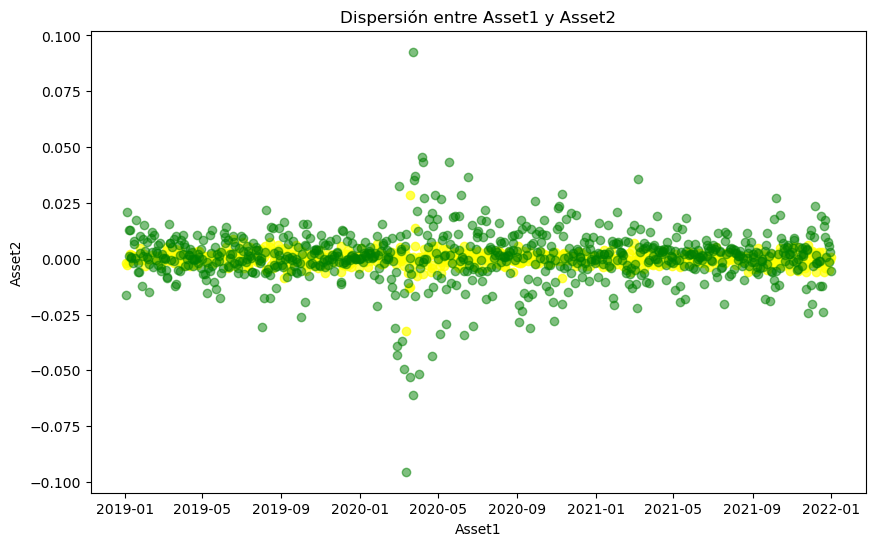

In [9]:
activo1 = 'Asset1'
activo2 = 'Asset2'

df_returns = df_returns.reset_index()
df_returns['date'] = pd.to_datetime(df_returns['date'])

plt.figure(figsize=(10, 6))
plt.scatter(df_returns['date'], df_returns[activo1], label=activo1, marker='o', alpha=0.7, color='yellow')
plt.scatter(df_returns['date'], df_returns[activo2], label=activo2, marker='o', alpha=0.5, color='green')

plt.title(f'Dispersión entre {activo1} y {activo2}')
plt.xlabel(activo1)
plt.ylabel(activo2)

plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

In [10]:
ruta_archivo_csv = 'financial_assets_information.csv'
df_asset = pd.read_csv(ruta_archivo_csv)

ruta_archivo_csv = 'portfolio_weights.csv.'
df_pesos = pd.read_csv(ruta_archivo_csv)

In [11]:
df_asset

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [12]:
df_pesos.info

<bound method DataFrame.info of            date    Asset1    Asset2    Asset3   Asset4    Asset5
0    2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1    2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2    2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3    2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
4    2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
..          ...       ...       ...       ...      ...       ...
778  2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
779  2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
780  2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
781  2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
782  2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[783 rows x 6 columns]>

In [13]:
df_pesos.sample(10)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
126,2019-06-27,0.225458,0.116255,0.265003,0.230310,0.162974
713,2021-09-27,0.071307,0.266093,0.168775,0.335470,0.158356
385,2020-06-24,0.321749,0.127529,0.123941,0.185697,0.241084
142,2019-07-19,0.225458,0.116255,0.265003,0.230310,0.162974
491,2020-11-19,0.321749,0.127529,0.123941,0.185697,0.241084
153,2019-08-05,0.225458,0.116255,0.265003,0.230310,0.162974
554,2021-02-16,0.071307,0.266093,0.168775,0.335470,0.158356
734,2021-10-26,0.071307,0.266093,0.168775,0.335470,0.158356
197,2019-10-04,0.225458,0.116255,0.265003,0.230310,0.162974
423,2020-08-17,0.321749,0.127529,0.123941,0.185697,0.241084


In [14]:
df_pesos.columns

Index(['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

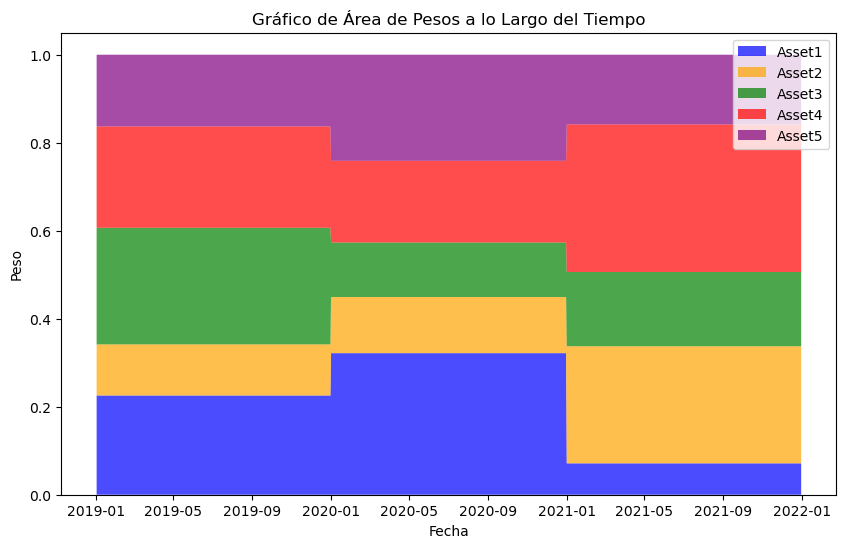

In [15]:
df_pesos['date'] = pd.to_datetime(df_pesos['date'])

columnas_pesos = ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']
plt.figure(figsize=(10, 6))

colores = ['blue', 'orange', 'green', 'red', 'purple']  

plt.stackplot(df_pesos['date'], df_pesos[columnas_pesos].values.T, labels=columnas_pesos, alpha=0.7, colors=colores)

plt.title('Gráfico de Área de Pesos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Peso')
plt.legend()
plt.show()

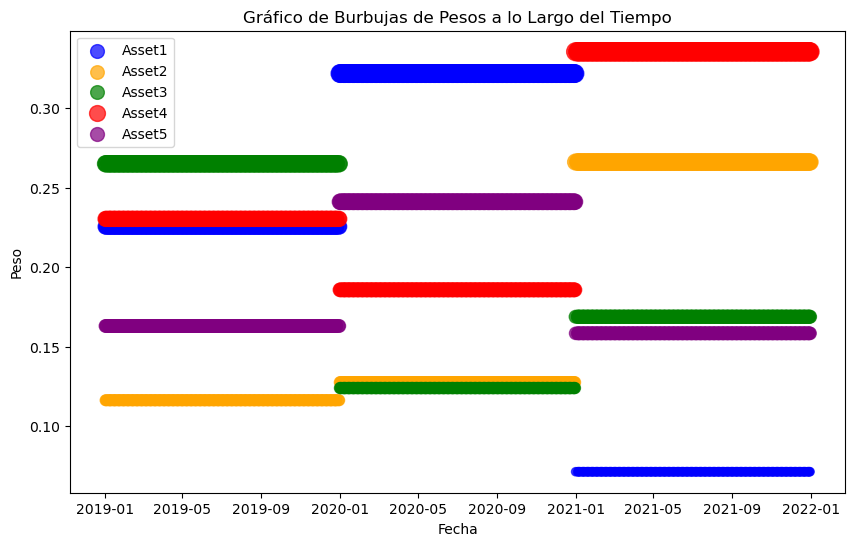

In [16]:
df_pesos['date'] = pd.to_datetime(df_pesos['date'])
plt.figure(figsize=(10, 6))

colores = ['blue', 'orange', 'green', 'red', 'purple']  

for i, col in enumerate(columnas_pesos):
    plt.scatter(df_pesos['date'], df_pesos[col], s=df_pesos[col] * 500, label=col, alpha=0.7, color=colores[i])

plt.title('Gráfico de Burbujas de Pesos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Peso')
plt.legend()
plt.show()

In [17]:
df_pesos.describe


<bound method NDFrame.describe of           date    Asset1    Asset2    Asset3   Asset4    Asset5
0   2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1   2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2   2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3   2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
4   2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
..         ...       ...       ...       ...      ...       ...
778 2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
779 2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
780 2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
781 2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
782 2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[783 rows x 6 columns]>

In [18]:
df_pesos.describe().T

,count,mean,min,25%,50%,75%,max,std
date,783,2020-07-02 09:33:47.586207232,2019-01-02 00:00:00,2019-10-02 12:00:00,2020-07-02 00:00:00,2021-04-01 12:00:00,2021-12-31 00:00:00,NaN
Asset1,783.0,0.206294,0.071307,0.071307,0.225458,0.321749,0.321749,0.103294
Asset2,783.0,0.169973,0.116255,0.116255,0.127529,0.266093,0.266093,0.068166
Asset3,783.0,0.185726,0.123941,0.123941,0.168775,0.265003,0.265003,0.05886
Asset4,783.0,0.250435,0.185697,0.185697,0.23031,0.33547,0.33547,0.062866
Asset5,783.0,0.187571,0.158356,0.158356,0.162974,0.241084,0.241084,0.038019


In [19]:
df_pesos[columnas_pesos].values

array([[0.22545796, 0.1162548 , 0.26500323, 0.23030958, 0.16297443],
       [0.22545796, 0.1162548 , 0.26500323, 0.23030958, 0.16297443],
       [0.22545796, 0.1162548 , 0.26500323, 0.23030958, 0.16297443],
       ...,
       [0.07130709, 0.26609275, 0.16877497, 0.33546969, 0.15835551],
       [0.07130709, 0.26609275, 0.16877497, 0.33546969, 0.15835551],
       [0.07130709, 0.26609275, 0.16877497, 0.33546969, 0.15835551]])

In [20]:
df_pesos.columns

Index(['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

In [21]:
df_pesos.sample(3)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
476,2020-10-29,0.321749,0.127529,0.123941,0.185697,0.241084
530,2021-01-13,0.071307,0.266093,0.168775,0.335470,0.158356
651,2021-07-01,0.071307,0.266093,0.168775,0.335470,0.158356


<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

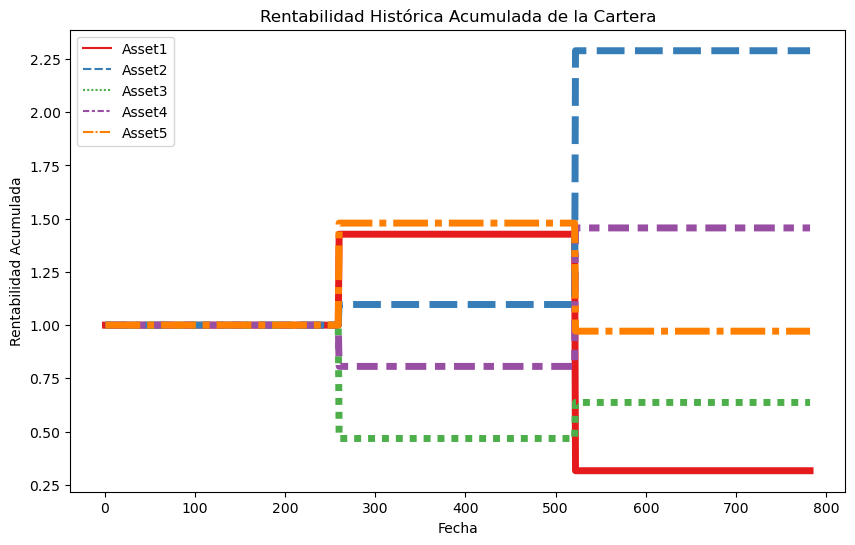

In [22]:
df_rendimientos = df_pesos[columnas_pesos].pct_change()

# Calcula la rentabilidad acumulada
df_rentabilidad_acumulada = (1 + df_rendimientos).cumprod()

plt.figure(figsize=(10, 6))
sns.lineplot(df_rentabilidad_acumulada, palette='Set1', linewidth=5)

plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')

plt.show()

In [23]:
df_rentabilidad_acumulada.sample(10)

,Asset1,Asset2,Asset3,Asset4,Asset5
553,0.316277,2.288875,0.636879,1.456603,0.971659
428,1.427092,1.096976,0.467694,0.806293,1.479278
638,0.316277,2.288875,0.636879,1.456603,0.971659
462,1.427092,1.096976,0.467694,0.806293,1.479278
657,0.316277,2.288875,0.636879,1.456603,0.971659
693,0.316277,2.288875,0.636879,1.456603,0.971659
772,0.316277,2.288875,0.636879,1.456603,0.971659
393,1.427092,1.096976,0.467694,0.806293,1.479278
316,1.427092,1.096976,0.467694,0.806293,1.479278
548,0.316277,2.288875,0.636879,1.456603,0.971659


<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [24]:
df_pesos.head(5)


,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [25]:
df_pesos.set_index('date', inplace=True)
df_rendimientos_diarios = df_pesos[columnas_pesos].pct_change()

df_rentabilidad_anualizada = (1 + df_rendimientos_diarios).resample('Y').prod() - 1
df_rentabilidad_anualizada['date'] = df_rentabilidad_anualizada.index

df_rentabilidad_anualizada

,Asset1,Asset2,Asset3,Asset4,Asset5,date
date,,,,,,
2019-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,2019-12-31
2020-12-31,0.427092,0.096976,-0.532306,-0.193707,0.479278,2020-12-31
2021-12-31,-0.778377,1.086533,0.361742,0.806543,-0.343153,2021-12-31


In [26]:
df_rentabilidad_anualizada2 = df_rentabilidad_anualizada.drop(columns=['date'])
df_rentabilidad_anualizada2

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-31,0.427092,0.096976,-0.532306,-0.193707,0.479278
2021-12-31,-0.778377,1.086533,0.361742,0.806543,-0.343153


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [27]:
varianza_diaria = df_rendimientos_diarios.var()

# Factor de anualización (en este caso, 261 días)
factor_anualizacion = 261

volatilidad_anualizada = varianza_diaria * factor_anualizacion

volatilidad_anualizada = volatilidad_anualizada**0.5

volatilidad_anualizada

Asset1    0.513205
Asset2    0.630135
Asset3    0.372035
Asset4    0.479345
Asset5    0.340748
dtype: float64

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [28]:
df_pesos_reset = df_pesos.reset_index()

# Utiliza melt para convertir las columnas de activos en filas
df_melted_pesos = pd.melt(df_pesos_reset, id_vars=['date'], var_name='Asset', value_name='Weight')

# Visualiza el DataFrame resultante
df_melted_pesos

,date,Asset,Weight
0,2019-01-02,Asset1,0.225458
1,2019-01-03,Asset1,0.225458
2,2019-01-04,Asset1,0.225458
3,2019-01-07,Asset1,0.225458
4,2019-01-08,Asset1,0.225458
...,...,...,...
3910,2021-12-27,Asset5,0.158356
3911,2021-12-28,Asset5,0.158356
3912,2021-12-29,Asset5,0.158356
3913,2021-12-30,Asset5,0.158356


In [29]:
def assign_family(asset):
    if asset in ['Asset1', 'Asset2']:
        return 'Fixed Income'
    elif asset in ['Asset3', 'Asset4']:
        return 'Equity'
    elif asset == 'Asset5':
        return 'Alternative'
    else:
        return 'Unknown'  # Otra opción en caso de activo desconocido

df_melted_pesos['family'] = df_melted_pesos['Asset'].apply(assign_family)

df_melted_pesos


,date,Asset,Weight,family
0,2019-01-02,Asset1,0.225458,Fixed Income
1,2019-01-03,Asset1,0.225458,Fixed Income
2,2019-01-04,Asset1,0.225458,Fixed Income
3,2019-01-07,Asset1,0.225458,Fixed Income
4,2019-01-08,Asset1,0.225458,Fixed Income
...,...,...,...,...
3910,2021-12-27,Asset5,0.158356,Alternative
3911,2021-12-28,Asset5,0.158356,Alternative
3912,2021-12-29,Asset5,0.158356,Alternative
3913,2021-12-30,Asset5,0.158356,Alternative


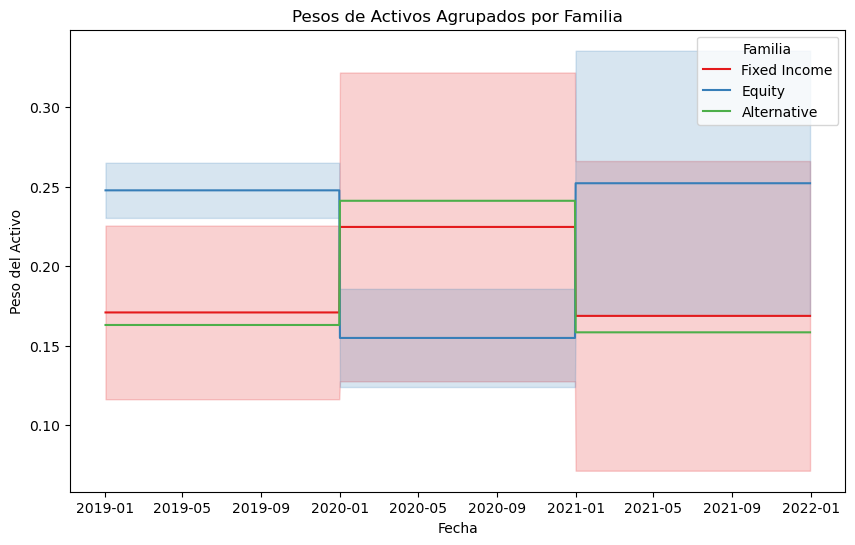

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Weight', hue='family', data=df_melted_pesos, palette='Set1')
plt.title('Pesos de Activos Agrupados por Familia')
plt.xlabel('Fecha')
plt.ylabel('Peso del Activo')
plt.legend(title='Familia')
plt.show()